<a href="https://colab.research.google.com/github/asheta66/Data-Mining/blob/main/Chap3_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


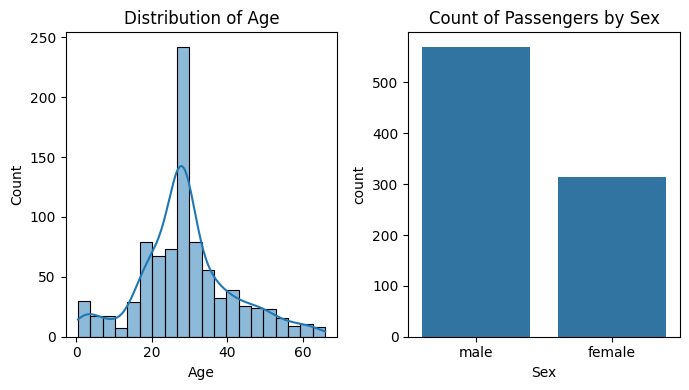

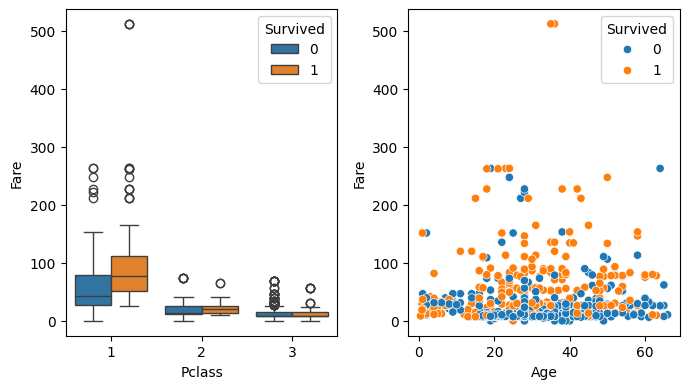

ANOVA Test - F-Statistic: 62.966395655008206, P-Value: 6.36263244771475e-15
Chi-square Test - Chi2 Statistic: 258.5698764191534, P-Value: 3.517646355019819e-58


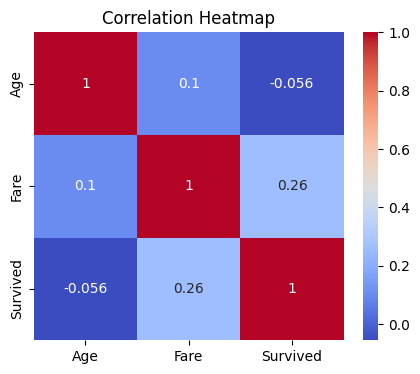

                                                Name  FamilySize
0                            Braund, Mr. Owen Harris           2
1  Cumings, Mrs. John Bradley (Florence Briggs Th...           2
2                             Heikkinen, Miss. Laina           1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)           2
4                           Allen, Mr. William Henry           1


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, zscore, f_oneway
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('titanic.csv')

# Display first few rows
df.head()

# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Filling missing values
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)

# Convert categorical variables
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Outlier detection using Z-score
z_scores = zscore(df['Age'])
outliers = np.where(np.abs(z_scores) > 3)
df = df.drop(outliers[0])

# Univariate Analysis
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
sns.countplot(x='Sex', data=df, ax=axes[1])
axes[1].set_title('Count of Passengers by Sex')
plt.tight_layout()
plt.show()

# Bivariate Analysis
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, ax=axes[0])
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived', ax=axes[1])
plt.tight_layout()
plt.show()

# Statistical Testing
f_statistic, p_value = f_oneway(df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare'])
print(f'ANOVA Test - F-Statistic: {f_statistic}, P-Value: {p_value}')

chi2_stat, p_val, _, _ = chi2_contingency(pd.crosstab(df['Survived'], df['Sex']))
print(f'Chi-square Test - Chi2 Statistic: {chi2_stat}, P-Value: {p_val}')

# Data Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(df[['Age', 'Fare', 'Survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df[['Name', 'FamilySize']].head())